### Task 1: EDA Analysis of data

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic_data = pd.read_csv('titanic.csv')



Tatanic dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


First few rows of the dataset
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1  

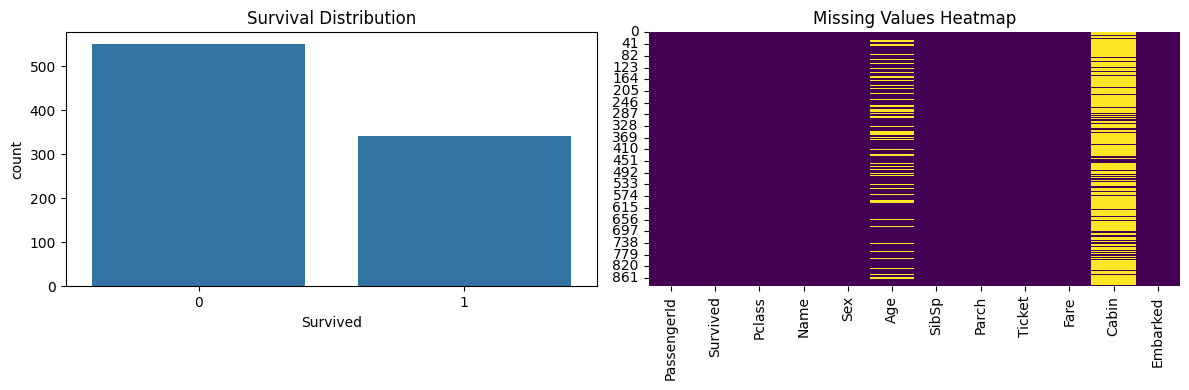

In [3]:

# Display dataset information
print("\nTatanic dataset information")
print(titanic_data.info())

# Display first few rows
print("\n\nFirst few rows of the dataset")
print(titanic_data.head())

# Summary statistics
print("\n\nSummary statistics of the dataset")
print(titanic_data.describe())

# Survival distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Survival distribution
sns.countplot(data=titanic_data, x='Survived', ax=ax[0])
ax[0].set_title('Survival Distribution')

# Missing values heatmap
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', ax=ax[1])
ax[1].set_title('Missing Values Heatmap')

plt.tight_layout()
plt.show()

### Task-2: Handling Missing Values

In [4]:
from sklearn.impute import SimpleImputer

# Display missing values
print('Missing Values:')
print(titanic_data.isnull().sum())

# Impute missing 'Age' with mean
imputer = SimpleImputer(strategy='mean')
titanic_data['Age'] = imputer.fit_transform(titanic_data[['Age']])
# Impute missing 'Cabin' with mode (most frequent)
imputer = SimpleImputer(strategy='most_frequent')
titanic_data['Cabin'] = imputer.fit_transform(titanic_data[['Cabin']]).ravel()
# Impute missing 'Embarked' with mode (most frequent)
titanic_data['Embarked'] = imputer.fit_transform(titanic_data[['Embarked']]).ravel()
print('\nMissing Values After Handling:')
print(titanic_data.isnull().sum())

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Task 3: Scaling and Normalizing

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns for scaling
numerical_cols = ['Age', 'Fare']

# Standardization (Z-score)
scaler = StandardScaler()
titanic_data_standardized = titanic_data.copy()
titanic_data_standardized[numerical_cols] = scaler.fit_transform(titanic_data[numerical_cols])

# Normalization (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
titanic_data_normalized = titanic_data.copy()
titanic_data_normalized[numerical_cols] = min_max_scaler.fit_transform(titanic_data[numerical_cols])

# Display examples
print("Standardized Data (First 5 Rows):")
print(titanic_data_standardized[numerical_cols].head())

print("Normalized Data (First 5 Rows):")
print(titanic_data_normalized[numerical_cols].head())

Standardized Data (First 5 Rows):
        Age      Fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337
Normalized Data (First 5 Rows):
        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


### Task 4: Handling Imbalance Data

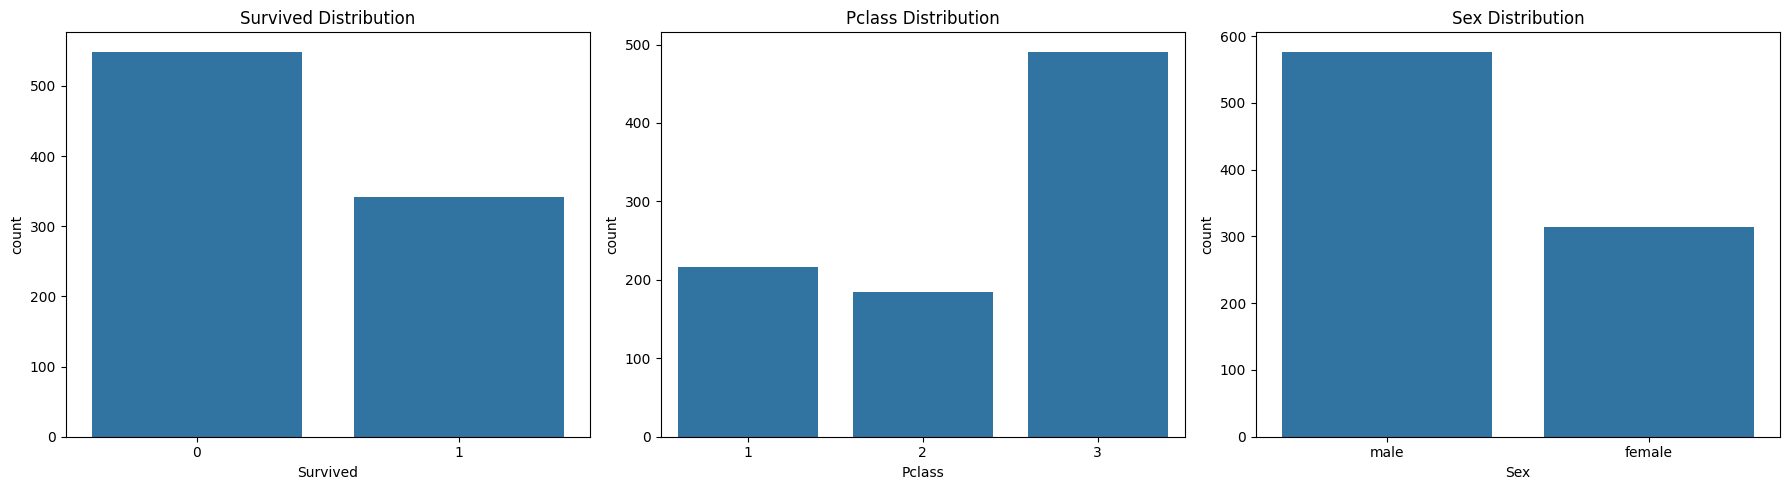

In [38]:
# Check balance of the target variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for 'Survived'
sns.countplot(data=titanic_data, x='Survived', ax=axes[0])
axes[0].set_title('Survived Distribution')

# Plot for 'Pclass'
sns.countplot(data=titanic_data, x='Pclass', ax=axes[1])
axes[1].set_title('Pclass Distribution')

# Plot for 'Sex'
sns.countplot(data=titanic_data, x='Sex', ax=axes[2])
axes[2].set_title('Sex Distribution')

plt.tight_layout()
plt.show()

### Task 5: Encoding Categorical variable

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# One-hot encoding for all categorical columns
categorical_cols = titanic_data.select_dtypes(include=['object']).columns
titanic_data_temp = titanic_data.copy()

for col in categorical_cols:
    one_hot = pd.get_dummies(titanic_data_temp[col], prefix=col)
    titanic_data_temp = pd.concat([titanic_data_temp, one_hot], axis=1)
    titanic_data_temp = titanic_data_temp.drop(columns=[col])

print("Data After One-Hot Encoding (First 5 Rows):")
print(titanic_data_temp.head())

# Label encoding for all categorical columns in the main dataframe
label_encoder = LabelEncoder()
for col in categorical_cols:
    titanic_data[col] = label_encoder.fit_transform(titanic_data[col])

print("\nData After Label Encoding (First 5 Rows):")
print(titanic_data.head())

Data After One-Hot Encoding (First 5 Rows):
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0      0   7.9250   
3            4         1       1  35.0      1      0  53.1000   
4            5         0       3  35.0      0      0   8.0500   

   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                     False                             False   
1                     False                             False   
2                     False                             False   
3                     False                             False   
4                     False                             False   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)  ...  Cabin_F G73  Cabin_F2  \
0                                  False  ...        False     False   
1                             

### Task 6: Feature transformation (PCA)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Define numerical_features_temp
numerical_features_temp = titanic_data_temp.select_dtypes(include=['float64', 'int64']).columns
# Exclude 'Survived' from the features
features_for_pca = numerical_features_temp.drop('Survived')

# Step 1: Apply PCA to reduce dimensionality
pca = PCA(n_components=6)
titanic_data_pca = titanic_data_temp.copy()
titanic_data_pca_temp = titanic_data_temp.copy()

# Apply PCA on selected features
pca_components = pca.fit_transform(titanic_data_temp[features_for_pca])

# Assign PCA components to new columns
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
titanic_data_pca_temp[pca_columns] = pca_components

# Optionally, drop the original features used for PCA
titanic_data_pca_temp = titanic_data_pca_temp.drop(columns=features_for_pca)


# Step 2: Train a classifier on the original dataset
X = titanic_data_temp.drop(columns=['Survived'])
y = titanic_data_temp['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)

# Step 3: Train a classifier on the PCA-transformed dataset
X_pca = titanic_data_pca_temp.drop(columns=['Survived'])
y_pca = titanic_data_pca_temp['Survived']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = clf_pca.predict(X_test_pca)

# Step 4: Compare the performance of both classifiers
print("Performance on Original Dataset:")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Classification Report:\n", classification_report(y_test, y_pred_original))

print("\nPerformance on PCA-Transformed Dataset:")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_pca))

Performance on Original Dataset:
Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Performance on PCA-Transformed Dataset:
Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



### Task 7: Train a Binary Classification Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select features and target
titanic_data_encoded = titanic_data.copy()
X = titanic_data_encoded.drop(columns=['Survived'])
y = titanic_data_encoded['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.8435754189944135


### Task 8: Train a multiclass classification model

In [43]:
# For multi-class classification, use Iris dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Split data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train a Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_iris, y_train_iris)

# Predictions
y_pred_iris = dt_model.predict(X_test_iris)

# Evaluation
print("Decision Tree Accuracy on Iris:", accuracy_score(y_test_iris, y_pred_iris))

Decision Tree Accuracy on Iris: 1.0


### Task 9: Evaluation mattrix and cross validation

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Confusion Matrix:
[[94 11]
 [17 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Cross-Validation Scores: [0.83798883 0.82022472 0.87640449 0.83707865 0.87078652]
Mean CV Score: 0.8484966417676227


### Task 10: Comparing Models

In [45]:
# Train multiple classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

print("Model Comparison:")
print(results)

Model Comparison:
{'Random Forest': 0.8435754189944135, 'Logistic Regression': 0.770949720670391, 'SVM': 0.6815642458100558, 'Naive Bayes': 0.7988826815642458, 'K-Nearest Neighbors': 0.6703910614525139}


d:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
